# NAMA : BRYANT STEVEN ARITONANG
# ID DICODING : bryantarios

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Untuk visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load Dataset menggunakan library Pandas

In [13]:
import pandas as pd
df_insurance = pd.read_csv('insurance.csv')
df_insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [14]:
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Cek Informasi Dataset

In [15]:
df_insurance.info() # mengecek informasi dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Cek Statistik Dataset

In [16]:
df_insurance.describe() # deskripsi stastitik data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Cari Missing Value

In [17]:
df_insurance.isnull().sum() # Find Missing Values in list Dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
#Total Number of Missing NA
df_insurance.isnull().sum().sum()

0

#Explorisasi Data / Visualisasi Data


<Axes: xlabel='age'>

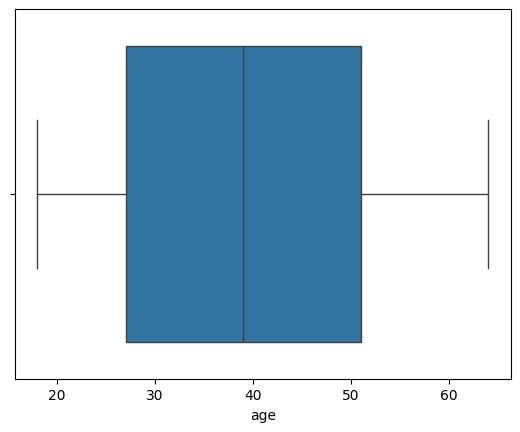

In [19]:
sns.boxplot(x=df_insurance['age']) # Visualisasi data age pada fitur numerik

<Axes: xlabel='bmi'>

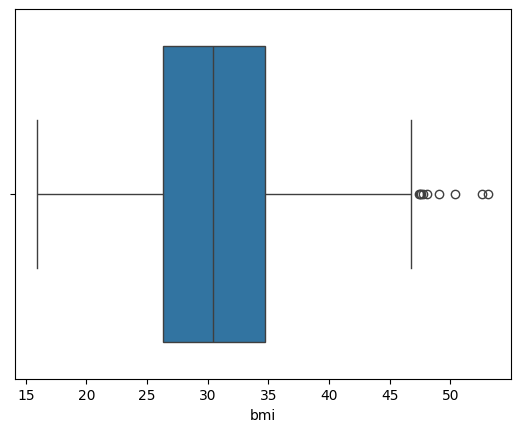

In [20]:
sns.boxplot(x=df_insurance['bmi']) # Visualisasi data bmi pada fitur numerik

<Axes: xlabel='children'>

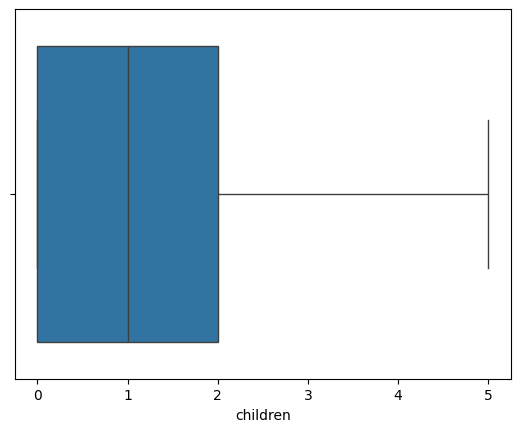

In [21]:
sns.boxplot(x=df_insurance['children']) # Visualisasi data children pada fitur numerik

<Axes: xlabel='charges'>

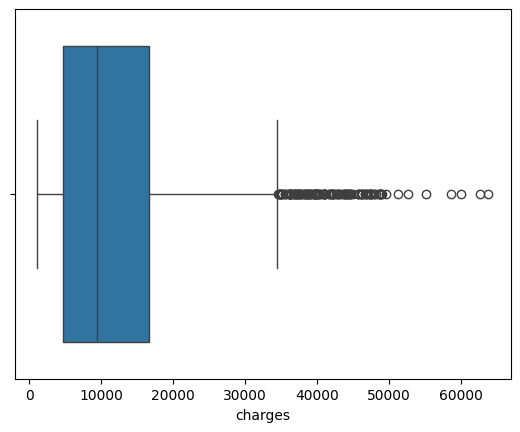

In [22]:
sns.boxplot(x=df_insurance['charges']) # Visualisasi data charges pada fitur numerik

Mengatasi Outlier

In [23]:
Q1 = df_insurance.quantile(0.25)
Q3 = df_insurance.quantile(0.75)
IQR=Q3-Q1
insurance=df_insurance[~((df_insurance<(Q1-1.5*IQR))|(df_insurance>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
insurance.shape

<ipython-input-23-a039e2551840>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_insurance.quantile(0.25)
<ipython-input-23-a039e2551840>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_insurance.quantile(0.75)
<ipython-input-23-a039e2551840>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  insurance=df_insurance[~((df_insurance<(Q1-1.5*IQR))|(df_insurance>(Q3+1.5*IQR))).any(axis=1)]


(1193, 7)

Membagi dataset kedalam 2 Fitur yaitu Numerical dan Categorical

In [24]:
numerical_features = ['age','bmi','children','charges']
categorical_features = ['sex','smoker','region']

Grouping Fitur Categori

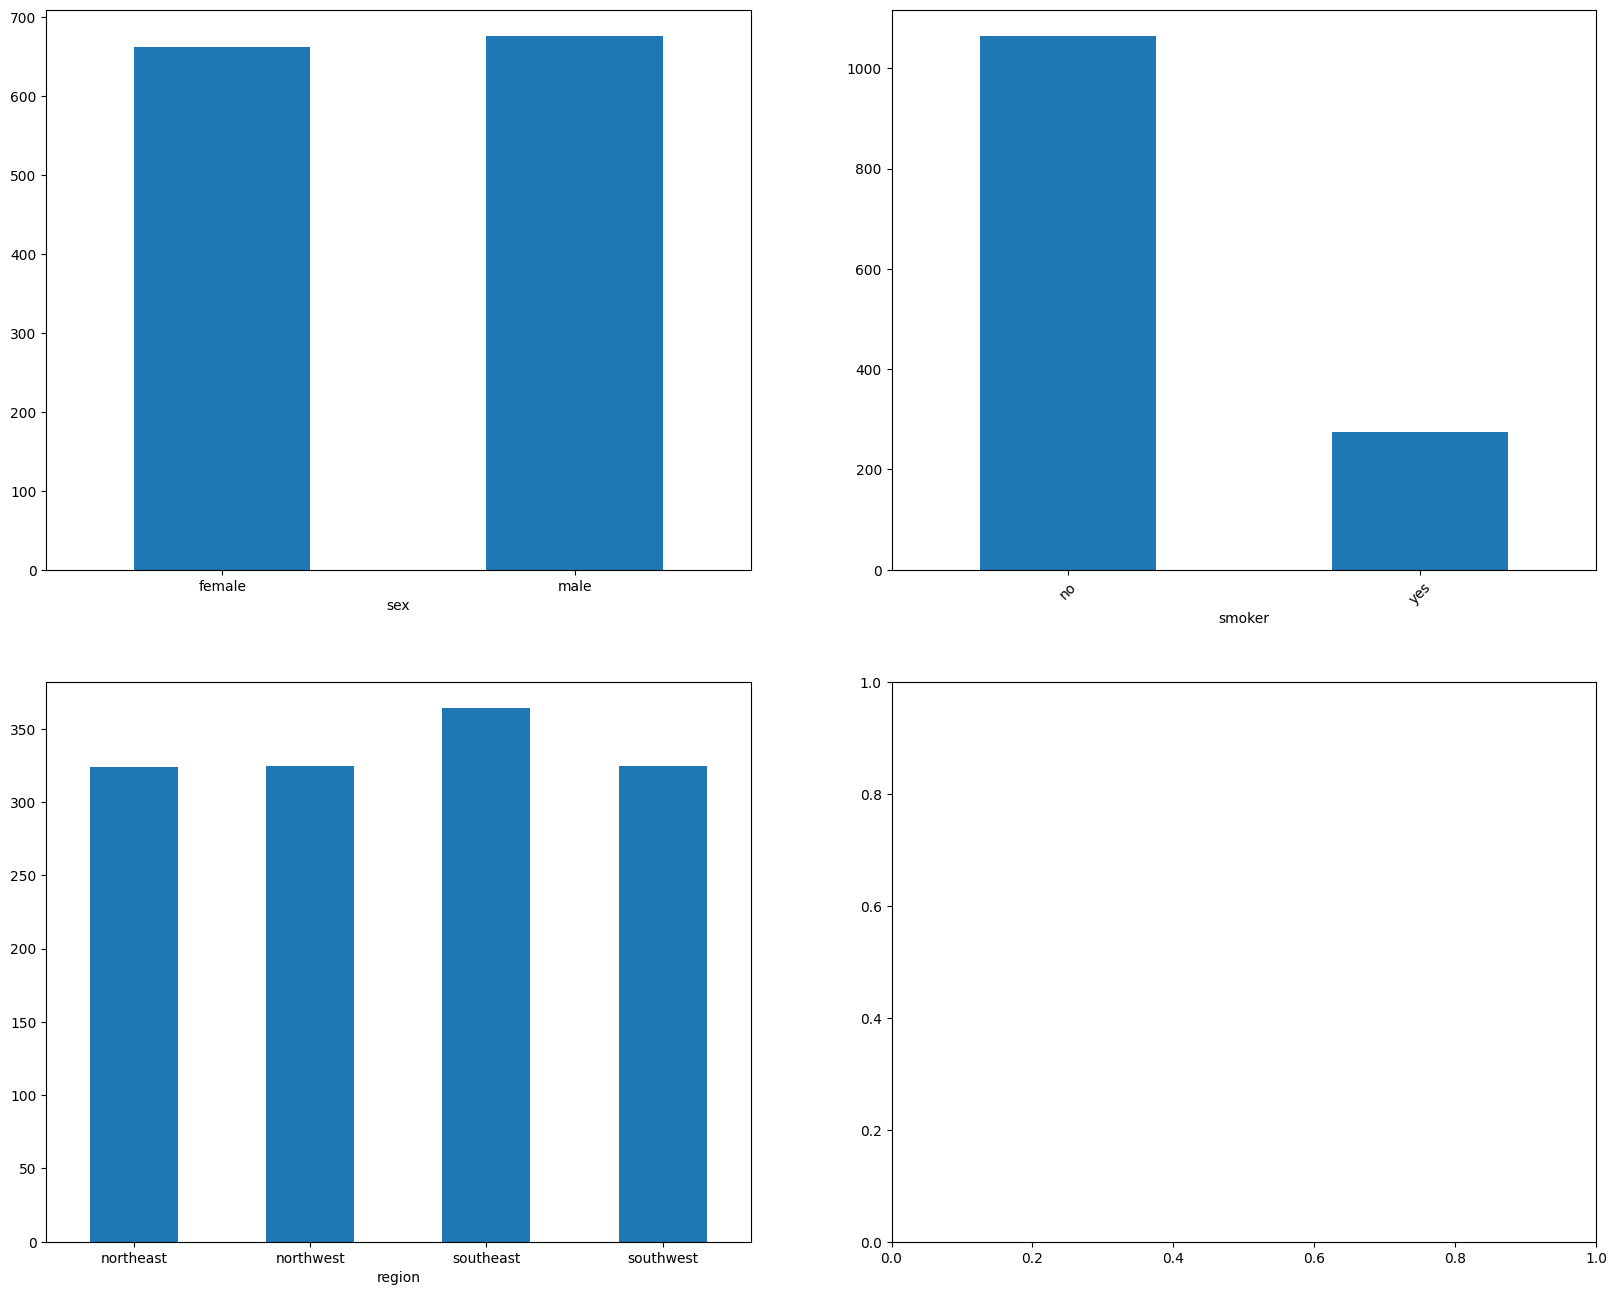

In [25]:
plt.subplots(2, 2, figsize=(20, 16))

for i, col in enumerate(categorical_features):
  plt.subplot(2, 2, i + 1)
  if col == 'smoker':
    df_insurance.groupby(col).size().plot(kind='bar', rot=45)
  else:
    df_insurance.groupby(col).size().plot(kind='bar', rot=0)


Visualisasi Fitur Categorical

        jumlah sampel  persentase
male              676        50.5
female            662        49.5


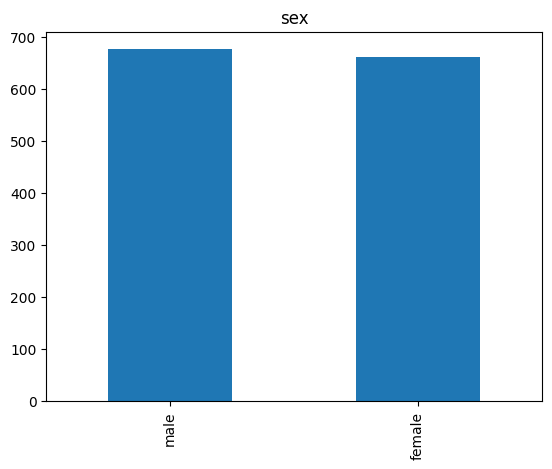

In [26]:
feature = categorical_features[0]
count = df_insurance[feature].value_counts()
percent = 100*df_insurance[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
no            1064        79.5
yes            274        20.5


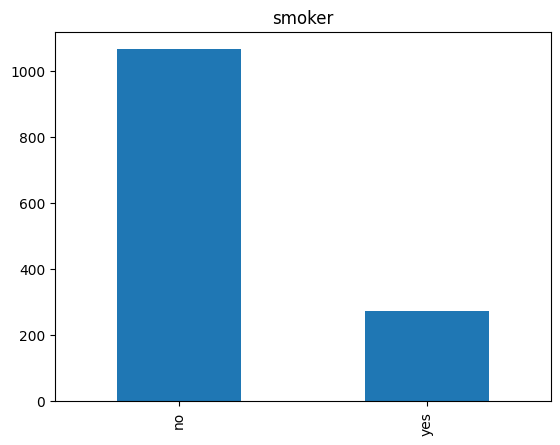

In [27]:
feature1 = categorical_features[1]
count1 = df_insurance[feature1].value_counts()
percent1 = 100*df_insurance[feature1].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count1, 'persentase':percent1.round(1)})
print(df2)
count1.plot(kind='bar', title=feature1);

           jumlah sampel  persentase
southeast            364        27.2
southwest            325        24.3
northwest            325        24.3
northeast            324        24.2


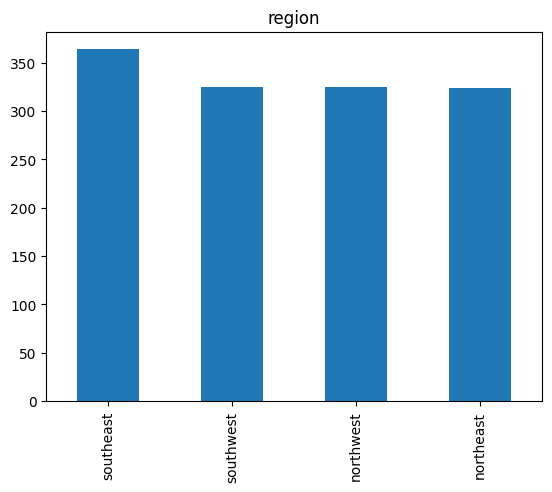

In [28]:
feature1 = categorical_features[2]
count1 = df_insurance[feature1].value_counts()
percent1 = 100*df_insurance[feature1].value_counts(normalize=True)
df3 = pd.DataFrame({'jumlah sampel':count1, 'persentase':percent1.round(1)})
print(df3)
count1.plot(kind='bar', title=feature1);

Visualisasi Fitur Numerical

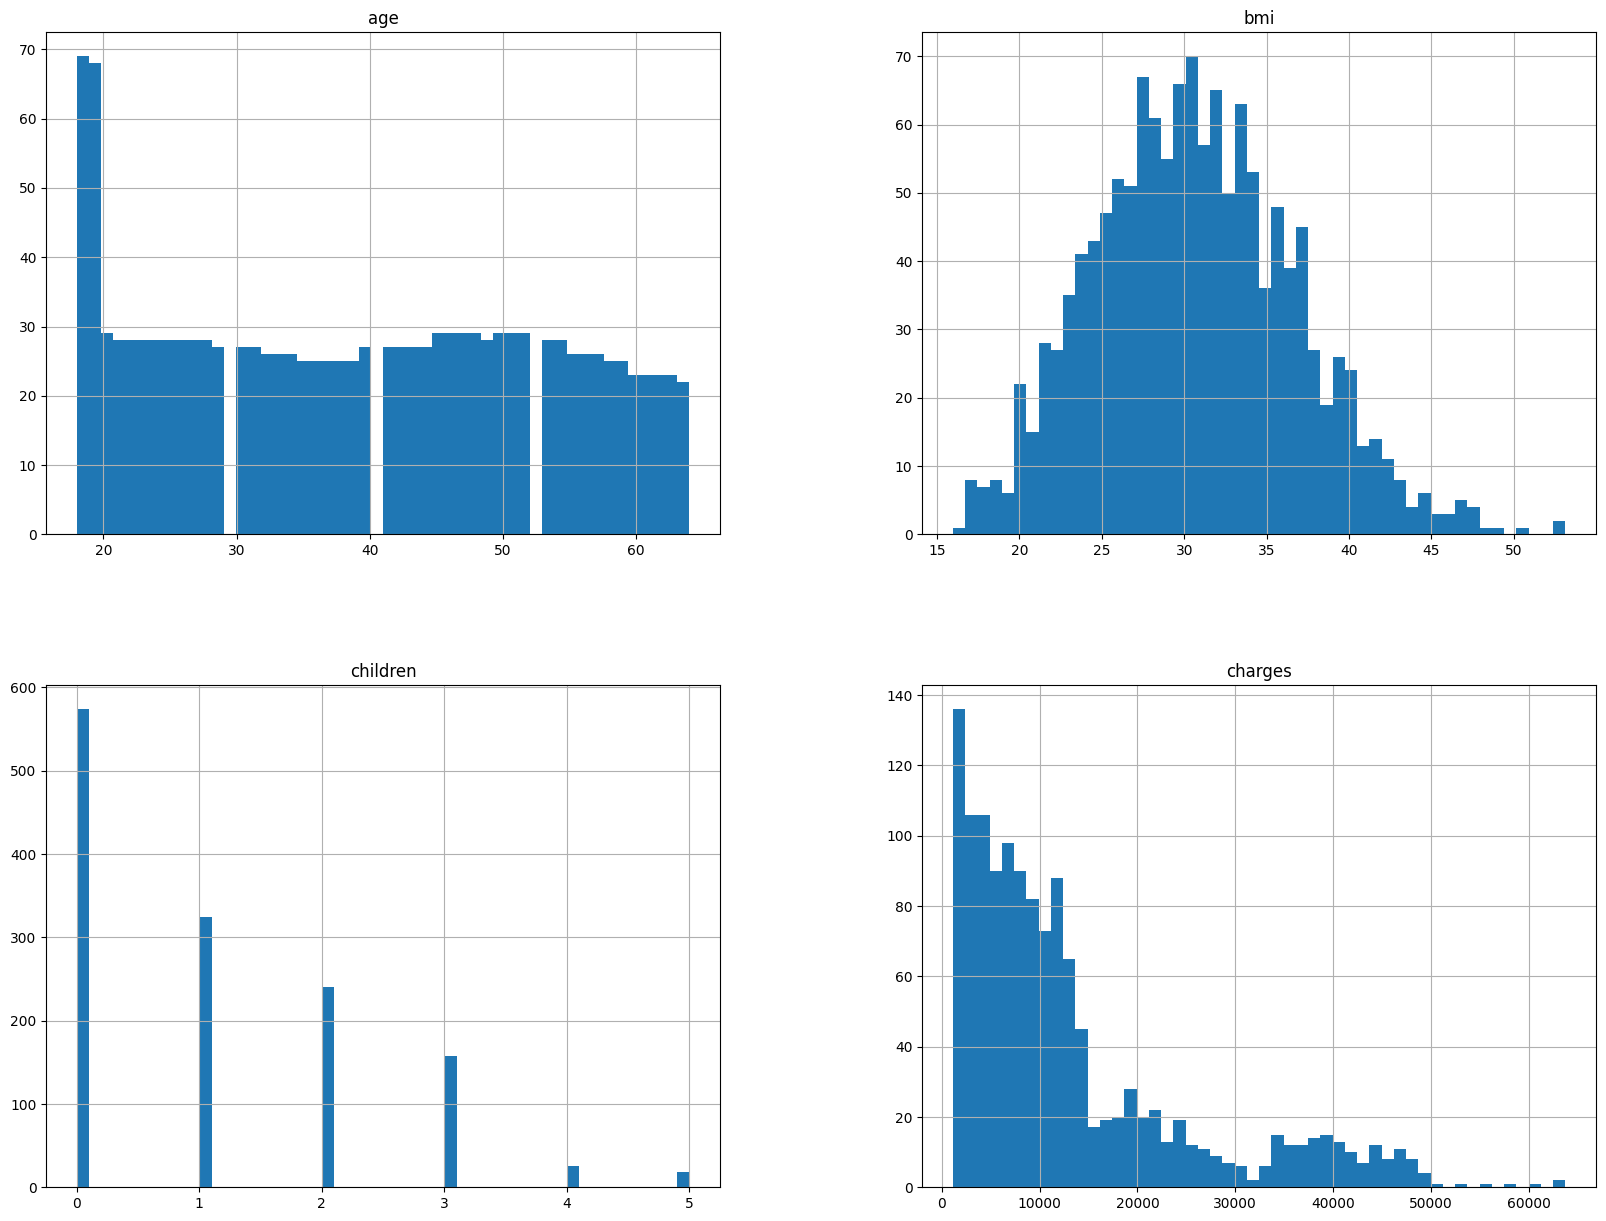

In [29]:
df_insurance.hist(bins=50, figsize=(20,15))
plt.show()

**Multivariate Analysis**
- Categorical Features

Dalam langkah ini, kita akan memeriksa rata-rata charges untuk setiap fitur guna menilai dampak fitur kategori terhadap charges.

<ipython-input-30-369da46898f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-30-369da46898f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-30-369da46898f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")


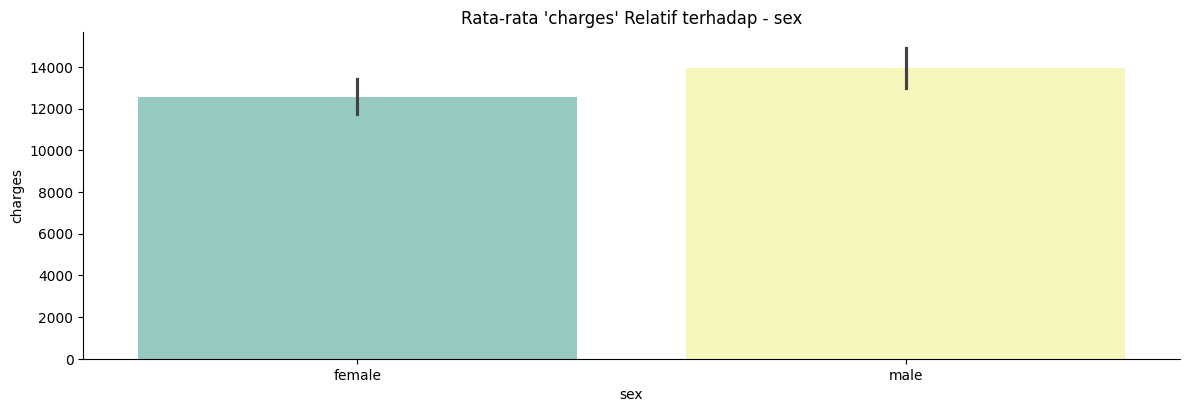

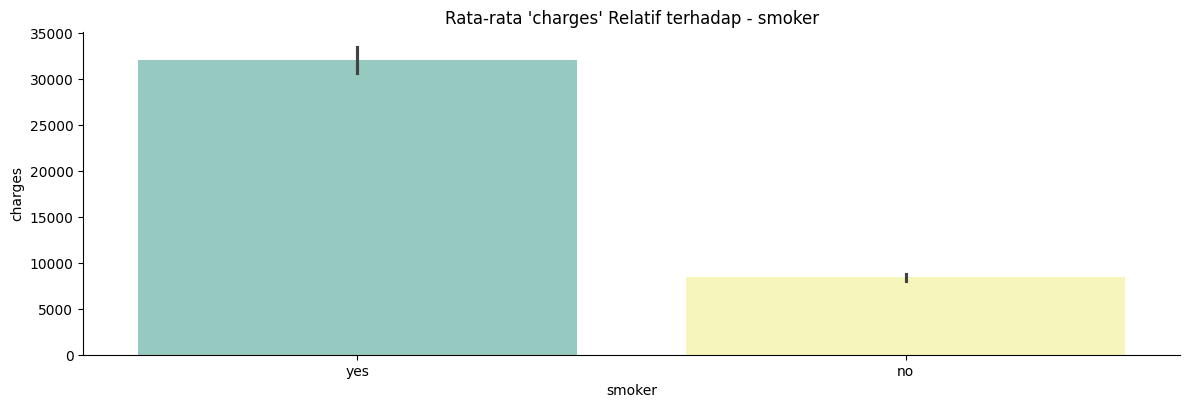

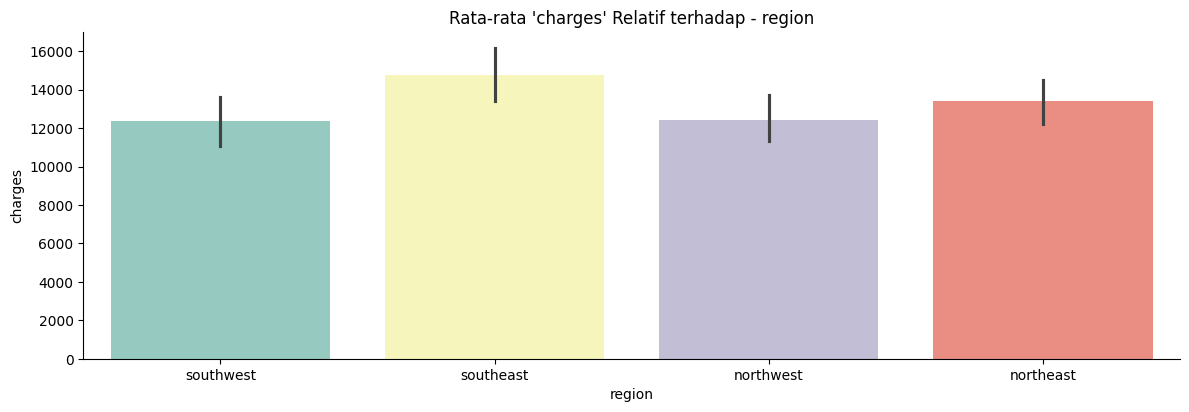

In [30]:
cat_features = df_insurance.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_insurance, palette="Set3")
  plt.title("Rata-rata 'charges' Relatif terhadap - {}".format(col))

- Numerical Features


Untuk mengamati keterkaitan antara fitur numerik, kita akan menggunakan fungsi pairplot(). Selain itu, kita akan mengamati korelasi antara fitur numerik dan fitur target melalui fungsi corr().

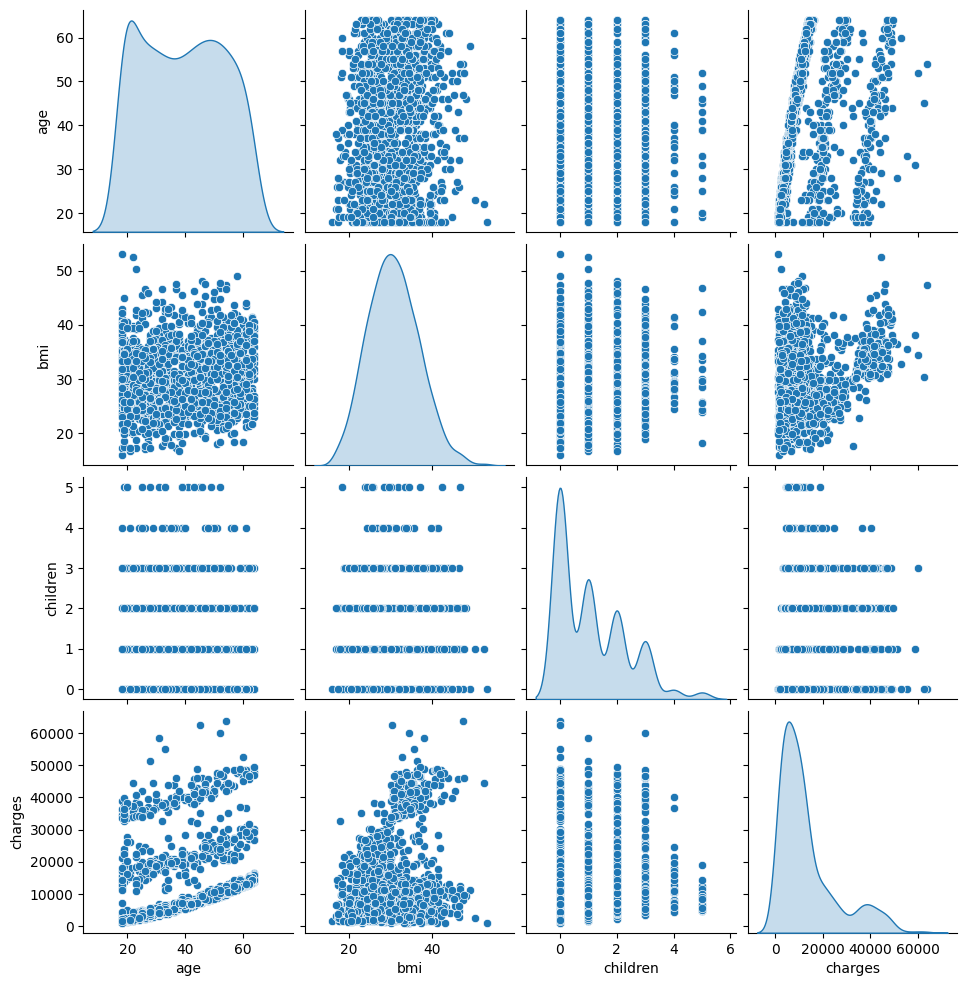

In [31]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_insurance, diag_kind = 'kde')

<ipython-input-33-9696ef74f017>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_insurance.corr().round(2) # Fungsi Cor -> evaluasi skor korelasi


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

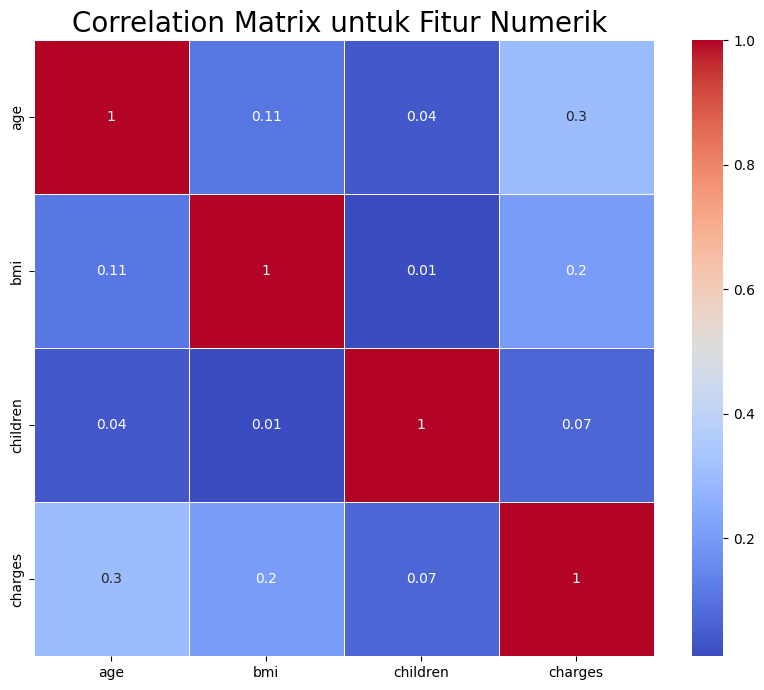

In [33]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_insurance.corr().round(2) # Fungsi Cor -> evaluasi skor korelasi

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [35]:
df_insurance.drop(['bmi'], inplace=True, axis=1)
df_insurance.head()

,age,sex,children,smoker,region,charges
0,19,female,0,yes,southwest,16884.92400
1,18,male,1,no,southeast,1725.55230
2,28,male,3,no,southeast,4449.46200
3,33,male,0,no,northwest,21984.47061
4,32,male,0,no,northwest,3866.85520


#Data Preparation

Penanganan category fitur dengan menggunakan One Hot Encoding

In [37]:
from sklearn.preprocessing import  OneHotEncoder
df_insurance = pd.concat([df_insurance, pd.get_dummies(df_insurance['sex'], prefix='sex')],axis=1)
df_insurance = pd.concat([df_insurance, pd.get_dummies(df_insurance['smoker'], prefix='smoker')],axis=1)
df_insurance = pd.concat([df_insurance, pd.get_dummies(df_insurance['region'], prefix='region')],axis=1)
df_insurance.drop(['sex','smoker','region'], axis=1, inplace=True)
df_insurance.head()

,age,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,16884.92400,1,0,0,1,0,0,0,1
1,18,1,1725.55230,0,1,1,0,0,0,1,0
2,28,3,4449.46200,0,1,1,0,0,0,1,0
3,33,0,21984.47061,0,1,1,0,0,1,0,0
4,32,0,3866.85520,0,1,1,0,0,1,0,0


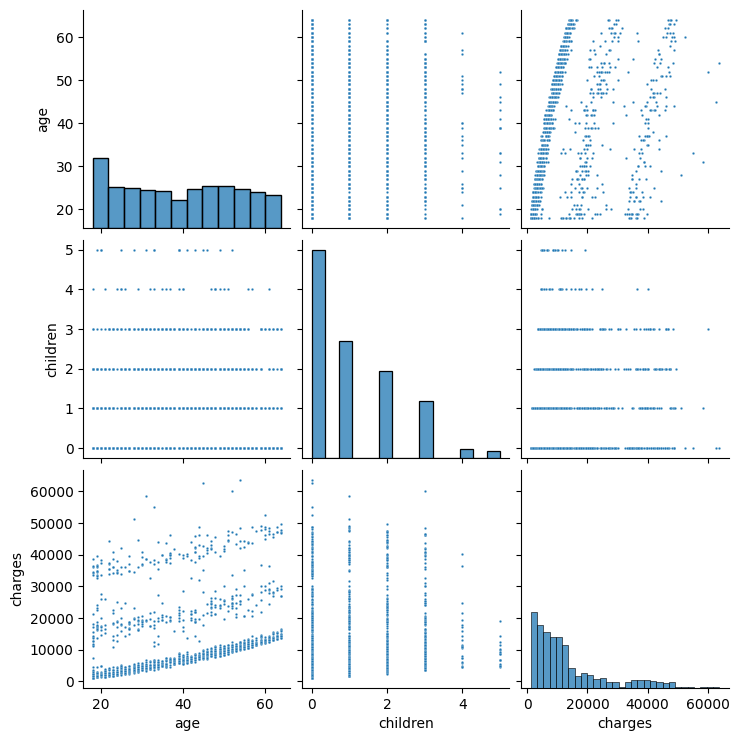

In [38]:
sns.pairplot(df_insurance[['age','children','charges']], plot_kws={"s":3});

In [39]:
df_insurance.head()

,age,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,16884.92400,1,0,0,1,0,0,0,1
1,18,1,1725.55230,0,1,1,0,0,0,1,0
2,28,3,4449.46200,0,1,1,0,0,0,1,0
3,33,0,21984.47061,0,1,1,0,0,1,0,0
4,32,0,3866.85520,0,1,1,0,0,1,0,0


Menggunakan Teknik PCA yang bertujuan untuk mengurangi reduksi dimensi saat dilakukan modelling

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(df_insurance[['age','children','charges']])
princ_comp = pca.transform(df_insurance[['age','children','charges']])

In [42]:
print(pca)

PCA(n_components=3, random_state=123)


In [43]:
pca.explained_variance_ratio_.round(3)

array([1., 0., 0.])

In [44]:
print (df_insurance)

      age  children      charges  sex_female  sex_male  smoker_no  smoker_yes  \
0      19         0  16884.92400           1         0          0           1   
1      18         1   1725.55230           0         1          1           0   
2      28         3   4449.46200           0         1          1           0   
3      33         0  21984.47061           0         1          1           0   
4      32         0   3866.85520           0         1          1           0   
...   ...       ...          ...         ...       ...        ...         ...   
1333   50         3  10600.54830           0         1          1           0   
1334   18         0   2205.98080           1         0          1           0   
1335   18         0   1629.83350           1         0          1           0   
1336   21         0   2007.94500           1         0          1           0   
1337   61         0  29141.36030           1         0          0           1   

      region_northeast  reg

Lakukan Split Dataset 80:20

In [45]:
from sklearn.model_selection import train_test_split

X = df_insurance.drop(["charges"],axis =1)
y = df_insurance["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [46]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1338
Total # of sample in train dataset: 1070
Total # of sample in test dataset: 268


Melakukan proses Standarisasi

In [47]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['age','children']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,age,children
67,0.062072,-0.067366
736,-0.150575,-0.886479
310,0.770896,-0.886479
963,0.487366,1.570860
680,-1.284694,-0.067366


In [48]:
X_train[numerical_features].head()

,age,children
67,0.062072,-0.067366
736,-0.150575,-0.886479
310,0.770896,-0.886479
963,0.487366,1.570860
680,-1.284694,-0.067366


In [49]:
X_train[numerical_features].describe().round(4)

,age,children
count,1070.0000,1070.0000
mean,0.0000,-0.0000
std,1.0005,1.0005
min,-1.4973,-0.8865
25%,-0.9303,-0.8865
50%,-0.0088,-0.0674
75%,0.8418,0.7517
max,1.7632,3.2091


Menyiapkan Dataframe untuk Analisis Model

In [50]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting','SVM'])

**KNN**

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

**RANDOM FOREST**

In [52]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

**BOOSTING**

In [53]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

**SVR**

In [54]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svm= SVR()
svm.fit(X_train, y_train)
models.loc['train_mse','svm'] = mean_squared_error(y_pred=svm.predict(X_train), y_true=y_train)

Melakukan Proses Scalling Fitur Numerik

In [55]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Persiapan dan Perhitungan MSE

In [56]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting','svm'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting,'svm':svm}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
 # Panggil mse
mse

,train,test
KNN,38190666.934227,45165701.590825
RF,12361073.677352,50698016.090074
Boosting,41173600.411401,37804782.197369
svm,159381957.446801,170699957.447317


Visualisasi Hasil Perhitungan MSE

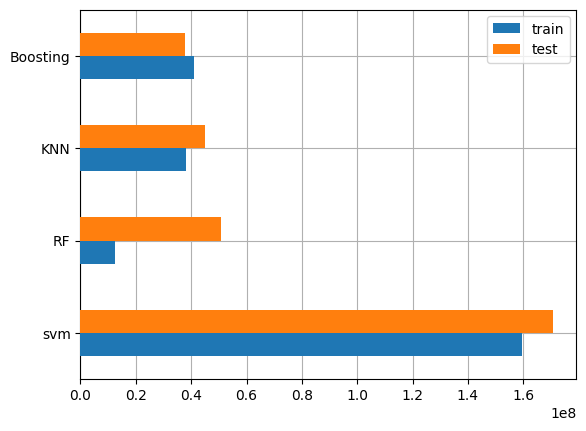

In [57]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Hasil Prediksi berdasarkan Perhitungan MSE

In [58]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

In [59]:
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting,prediksi_svm
650,9800.8882,9651.5,9755.4,12167.0,9312.6
